In [6]:
import audio as au

import wave
import numpy as np
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import copy
from scipy.signal import butter, lfilter
import scipy.ndimage

In [7]:
### Parameters ###
fft_size = 512 # window size for the FFT
step_size = fft_size/16 # distance to slide along the window (in time)
spec_thresh = 4 # threshold for spectrograms (lower filters out more noise)
lowcut = 500 # Hz # Low cut for our butter bandpass filter
highcut = 15000 # Hz # High cut for our butter bandpass filter
# For mels
n_mel_freq_components = 64 # number of mel frequency channels
shorten_factor = 10 # how much should we compress the x-axis (time)
start_freq = 300 # Hz # What frequency to start sampling our melS from 
end_freq = 8000 # Hz # What frequency to stop sampling our melS from Loading the WAV

In [8]:
# Grab your wav and filter it
mywav = 'tapestry.wav'
rate, data = read(mywav)
data = au.butter_bandpass_filter(data, lowcut, highcut, rate, order=1)
# Only use a short clip for our demo
if np.shape(data)[0]/float(rate) > 10:
    data = data[0:rate*10] 
print('Length in time (s): ', np.shape(data)[0]/float(rate))

ValueError: Digital filter critical frequencies must be 0 < Wn < 1

In [15]:
wav_spectrogram = au.pretty_spectrogram(data.astype('float64'), fft_size = fft_size, 
                                   step_size = step_size, log = True, thresh = spec_thresh)

array([15, -8,  0, ..., -8, -8,  7], dtype=int16)

Text(0.5,1.05,'Original Spectrogram')

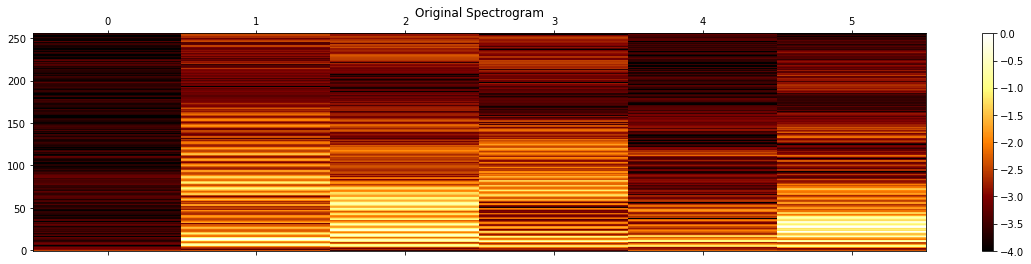

In [12]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,4))
cax = ax.matshow(np.transpose(wav_spectrogram), interpolation='nearest', aspect='auto', cmap=plt.cm.afmhot, origin='lower')
fig.colorbar(cax)
plt.title('Original Spectrogram')